<a href="https://colab.research.google.com/github/bryanMontoya/mlTalleres/blob/main/Taller5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taller 5.**


*   Johjan Stiven Puerta Castaño.
*   Brayan Montoya Osorio.



# **Capítulo 7: Punto 1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA

In [ ]:
col_names = ['pregnant', 'glucose', 'bp','skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
path = 'drive/MyDrive/data/diabetes.csv'
pima = pd.read_csv(path)
pima = pima.set_axis(col_names, axis = 1)
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
X = pima.drop('label', axis = 1)
y = pima.label
print(X.shape)

(768, 8)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)                                                  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Se procede a entrenar los modelos de KNN, RL, DT, RF, XGB y SVM con el dataset de diabetes, encontrando los respectivos parámetros para cada modelo.

**KNN**

Se realiza validación cruzada para encontrar los mejores parámetros para el modelo de KNN, en este caso solo se procede a encontrar el número de vecinos óptimos **K**, como se ve a continuación:

In [ ]:
#Se da un rango entre 3 y 30 vecinos para probar.
parameters = {'n_neighbors' : range(3,30)} 

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid = parameters, cv = 5) 
clf.fit(X_train, y_train)
print('Cantidad de vecinos óptimos:', clf.best_params_)

Cantidad de vecinos óptimos: {'n_neighbors': 14}


Se entrena el modelo con la cantidad de vecinos óptimos en este caso 14. Otros parámetros como la métrica se dejan por defecto.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train, y_train)
print('Accuracy en train:{:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy en test:{:.2f}'.format(clf.score(X_test, y_test)))

Accuracy en train:0.78
Accuracy en test:0.76


Finalmente se encuentra el tpr y fpr para graficar la curva ROC, de igual manera se encuentra el área bajo la curva AUC que será la métrica de desempeño utilzada.

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
tprKnn, fprKnn, _ = roc_curve(y_test, y_pred_proba)
aucKnn = roc_auc_score(y_test, y_pred_proba)
print("AUC KNN:{:.2f}".format(aucKnn))

AUC KNN:0.81


**LR**

Se procede a entrenar el modelo de Regresión logística:

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
print('Accuracy en train:{:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy en test:{:.2f}'.format(clf.score(X_test, y_test)))

Accuracy en train:0.78
Accuracy en test:0.76


Se calcula el fpr, tpr y auc para el modelo de regresión logística.

In [ ]:
y_pred_proba = LR_model.predict_proba(X_test)[:,1]
tprLr, fprLr, _ = roc_curve(y_test, y_pred_proba)
aucLr = roc_auc_score(y_test, y_pred_proba)
print("AUC RL:{:.2f}".format(aucLr))

AUC RL:0.86


**DT**

Se realiza validación cruzada con 5 folders para el modelo de DT, con el fin de encontrar la profundidad óptima:

In [ ]:
#Escoger la profundidad con validación cruzada.
tree_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
parameters = {'max_depth': range(3,8)}
clf = GridSearchCV(tree_model, param_grid = parameters, cv = 5) 
clf.fit(X_train, y_train)
print('La profundidad óptima es: ',clf.best_params_)

La profundidad óptima es:  {'max_depth': 5}


Teniendo una profundidad óptima de 5 se entrena el modelo y se procede a calcular los accuracys en entrenamiento y test.

In [ ]:
print('Accuracy en entrenamiento: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy en test: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy en entrenamiento: 0.85
Accuracy en test: 0.74


Se calcula el fpr, tpr y auc para el modelo:

In [ ]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
tprDt, fprDt, _ = roc_curve(y_test, y_pred_proba)
aucDt = roc_auc_score(y_test, y_pred_proba)
print("AUC DT:{:.2f}".format(aucDt))

AUC DT:0.79


**RF**

Para el modelo de Random Forest no es necesario realizar validación cruzada para encontrar parámetros óptimos sino que estos se dejan por defecto. Se procede a entrenar el modelo y a calcular los accuracys en entrenamiento y test:

In [ ]:
RF_model = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'sqrt' ) 
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print('Accuracy en entrenamiento: {:.2f}'.format(RF_model.score(X_train, y_train)))
print('Accuracy en test: {:.2f}'.format(RF_model.score(X_test, y_test)))

Accuracy en entrenamiento: 1.00
Accuracy en test: 0.79


Se calcula el fpr, tpr y auc para el modelo de RF:

In [ ]:
y_pred_proba = RF_model.predict_proba(X_test)[:,1]
tprRf, fprRf, _ = roc_curve(y_test, y_pred_proba)
aucRf = roc_auc_score(y_test, y_pred_proba)
print("AUC RF:{:.2f}".format(aucRf))

AUC RF:0.84


**XGB**

Se procede a entrenar el modelo de XGB con el dataset de diabetes:

In [ ]:
xgb_model = XGBClassifier(n_estimators = 88, max_depth = 3, objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1, seed = 27)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

Se calculan los accuracys en entrenamiento y test para el modelo:

In [ ]:
print('Accuracy en entrenamiento: {:.2f}'.format(xgb_model.score(X_train, y_train)))
print('Accuracy en test: {:.2f}'.format(xgb_model.score(X_test, y_test)))

Accuracy en entrenamiento: 0.89
Accuracy en test: 0.74


Se calcula el tpr, fpr y auc para el modelo de XGB:

In [ ]:
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
tprXgb, fprXgb, _ = roc_curve(y_test, y_pred_proba)
aucXgb = roc_auc_score(y_test, y_pred_proba)
print("AUC XGB:{:.2f}".format(aucXgb))

AUC XGB:0.85


**SVM**

Se realiza validación cruzada con el modelo de SVM para encontrar el $C$ y $r$ óptimos.

In [ ]:
clf = SVC(kernel = 'rbf', probability = True) 
parameters = {'C': np.logspace(-4,4,9), 'gamma': np.logspace(-4,4,9)}
SVM_model = GridSearchCV(clf, param_grid = parameters, cv = 5)    
SVM_model.fit(X_train, y_train)
print('Mejores hiperparámetros: ', SVM_model.best_params_)

Mejores hiperparámetros:  {'C': 10.0, 'gamma': 0.01}


Se entrena nuevamente el modelo con los mejores hiperparámetros encontrados anteriormente a través de validación cruzada:

In [ ]:
SVM_model = SVC(kernel = 'rbf', probability = True, C = SVM_model.best_params_['C'], gamma = SVM_model.best_params_['gamma'])
SVM_model.fit(X_train, y_train)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Se calculan los accuracys en entrenamiento y test para el modelo:

In [ ]:
print('Accuracy en entrenamiento: {:.2f}'.format(SVM_model.score(X_train, y_train)))
print('Accuracy en test: {:.2f}'.format(SVM_model.score(X_test, y_test)))

Accuracy en entrenamiento: 0.80
Accuracy en test: 0.79


Se calcula el tpr, fpr y auc para el modelo de SVM:

In [ ]:
y_pred_proba = SVM_model.predict_proba(X_test)[:,1]
tprSvm, fprSvm, _ = roc_curve(y_test, y_pred_proba)
aucSvm = roc_auc_score(y_test, y_pred_proba)
print("AUC SVM:{:.2f}".format(aucSvm))

AUC SVM:0.87


**Curva ROC**

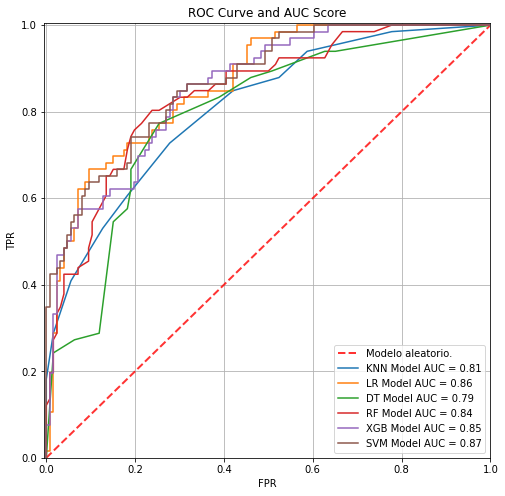

In [ ]:
plt.figure(figsize = (8,8))
plt.plot([0,1],[0,1],linestyle = '--', alpha = 0.8, lw = 2, label = 'Modelo aleatorio.', color = 'r')
plt.plot(tprKnn, fprKnn, label = "KNN Model AUC = {:.2f}".format(aucKnn))
plt.plot(tprLr, fprLr, label = "LR Model AUC = {:.2f}".format(aucLr))
plt.plot(tprDt, fprDt, label = "DT Model AUC = {:.2f}".format(aucDt))
plt.plot(tprRf, fprRf, label = "RF Model AUC = {:.2f}".format(aucRf))
plt.plot(tprXgb, fprXgb, label = "XGB Model AUC = {:.2f}".format(aucXgb))
plt.plot(tprSvm, fprSvm, label = "SVM Model AUC = {:.2f}".format(aucSvm))


plt.grid();
plt.title("ROC Curve and AUC Score")
plt.legend();
plt.xlim([-0.005,1]);
plt.ylim([0,1.005]);
plt.legend(loc = 'best');
plt.xlabel('FPR');
plt.ylabel('TPR');

De acuerdo a la gráfica anterior se puede observar que los modelos con mejor desempeño son los de RF, LR, SVM y XGB, mientras que los modelos de KNN y DT tienen los menores desempeños, esto de acuerdo a la métrica de área bajo la curva AUC.

# **Capítulo 10: Punto 1**

**Ver PDF Adjunto. :)**

# **Capítulo 10: Punto 2**

Se procede a construir una red neuronal con tensorflow, para realizar clasificación de prendas de vestir con la base de datos de Fashion_mnist.

In [ ]:
import tensorflow as tf
from random import randint

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model #Crear modelo de NN
from tensorflow.keras.layers import Input, Dense, Flatten, concatenate

Se carga la base de datos dividiendo entre train y test.

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data();

RSHAPED = 784

In [ ]:
num_classes = 10
img_rows, img_columns = 28, 28
num_channeels = 1
input_shape = (img_rows, img_columns, num_channeels)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)

(60000, 28, 28)
(10000, 28, 28)
[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Se procede a graficar algunas muestras de la base de datos con su etiqueta.

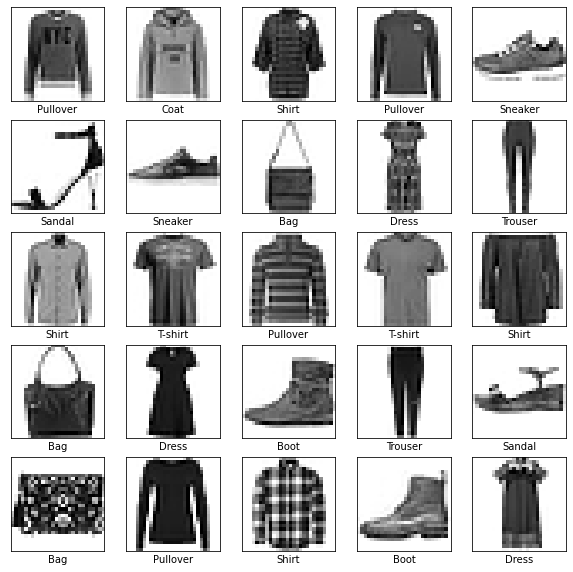

In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  n = randint(0, X_train.shape[0]-1)
  plt.imshow(X_train[n], cmap = plt.cm.binary) #Graficar imagenes
  plt.xlabel(class_names[y_train[n]])

A continuación se crea el modelo usando tensorflow. Este consta de una capa de entrada con una forma de 28 x 28 pues es el tamaño de cada imagen.
Posteriormente se crean las capas intermedias, con 128, 64, 32 y 16 neuronas respectivamente, por último se crea la capa de salida con 10 neuronas, cada neurona se encarga de predecir una clase.

In [ ]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (28, 28))) #Capa de entrada.
model.add(Dense(128, activation = 'relu')) #Capas intermedias.
model.add(Dense(64, activation = 'relu')) #Capas intermedias.
model.add(Dense(32, activation = 'relu')) #Capas intermedias.
model.add(Dense(16, activation = 'relu')) #Capas intermedias.
model.add(Dense(num_classes, activation = 'softmax')) #Capas de salida.

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
________________________________________________

Se procede a compilar y a entrenar el modelo, con 20 épocas.

In [ ]:
model.compile(tf.keras.optimizers.SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 20, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8671 - accuracy: 0.6999 - val_loss: 0.5967 - val_accuracy: 0.7905
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5161 - accuracy: 0.8194 - val_loss: 0.4953 - val_accuracy: 0.8250
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4513 - accuracy: 0.8398 - val_loss: 0.4566 - val_accuracy: 0.8355
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4129 - accuracy: 0.8521 - val_loss: 0.4553 - val_accuracy: 0.8364
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3901 - accuracy: 0.8602 - val_loss: 0.4235 - val_accuracy: 0.8456
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3680 - accuracy: 0.8676 - val_loss: 0.3955 - val_accuracy: 0.8588
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3534 - accuracy: 0.8720 - val_loss: 0.3849 - val_accuracy:

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
# install helper utilities
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils
import importlib
importlib.reload(utils)

fatal: destination path 'ssp19ai_utils' already exists and is not an empty directory.
Already up to date.


<module 'ssp19ai_utils.utils' from '/content/ssp19ai_utils/utils.py'>

Se procede a graficar aleatoriamente algunas de las perdicciones hechas por el modelo. Las gráficas azules están correctamente clasificadas. Las rojas son incorrectas. De igual manera muestra la probabilidad de predicción del modelo para cada muestra.

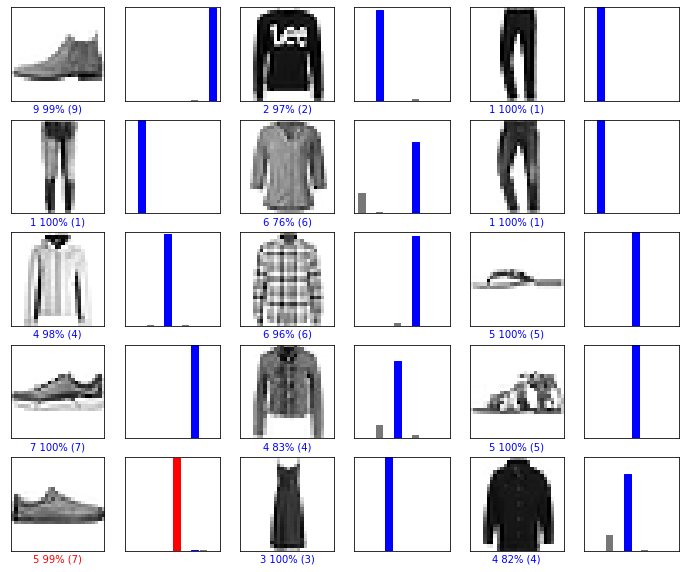

In [ ]:
utils.plot_multi_images_prob(y_pred, y_test, X_test)

Por último se procede a graficar la matriz de confusión.

In [ ]:
# As always - let's convert the probabilities array into classes
predicted_classes = utils.label_with_highest_prob(y_pred)

Confusion matrix


<Figure size 720x720 with 0 Axes>

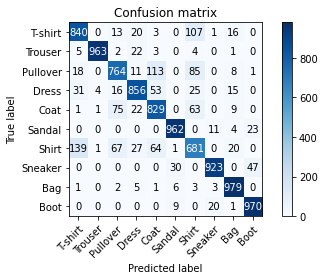

In [ ]:
# Plot the matrix
plt.figure(figsize = (10,10))
utils.plot_confusion_matrix(y_pred = predicted_classes, y_true = y_test, classes=np.array(class_names));